In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
import os
from subprocess import check_output

In [2]:
#df = pd.read_csv('../input/heart.csv')
df = pd.read_csv('heart.csv')
df[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.drop_duplicates(inplace = True)  # drop duplicates. 
print(df.info())   # I check whether or not there's null data.  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age         302 non-null int64
sex         302 non-null int64
cp          302 non-null int64
trestbps    302 non-null int64
chol        302 non-null int64
fbs         302 non-null int64
restecg     302 non-null int64
thalach     302 non-null int64
exang       302 non-null int64
oldpeak     302 non-null float64
slope       302 non-null int64
ca          302 non-null int64
thal        302 non-null int64
target      302 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None


In [4]:
df.rename(columns={
        'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
        'chol':'cholestoral','fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic','thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina','oldpeak':'ST_depression',
        'slope':'slope_ST','ca':'number_of_major_vessels'},
    inplace=True)

print(df.columns.tolist())

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression', 'slope_ST', 'number_of_major_vessels', 'thal', 'target']


In [5]:
df['sex'] = df['sex'].map({0:'female', 1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})
df['slope_ST'] = df['slope_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_ST,number_of_major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


In [6]:
print(df.info())         #  dataset size and types
print('\nData Shape:  {}'.format(df.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age                             302 non-null int64
sex                             302 non-null object
chest_pain_type                 302 non-null object
resting_blood_pressure          302 non-null int64
cholestoral                     302 non-null int64
fasting_blood_sugar             302 non-null object
resting_electrocardiographic    302 non-null object
maximum_heart_rate              302 non-null int64
exercise_induced_angina         302 non-null object
ST_depression                   302 non-null float64
slope_ST                        302 non-null object
number_of_major_vessels         302 non-null int64
thal                            302 non-null object
target                          302 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 35.4+ KB
None

Data Shape:  (302, 14)


In [7]:
df.describe()   #  NUMERICAL DATA

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,number_of_major_vessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [8]:
df.describe(include=['O'])   #  CATEGORICAL DATA

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,slope_ST,thal,target
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,4,2
top,male,typical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,fixed defect,disease
freq,206,143,257,151,203,141,165,164


In [9]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_ST,number_of_major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


In [10]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
    else:
        colCAT.append(i)
    print('unique values:  {}\t{}'.format(len(df[i].unique()),i))

dataCAT = df[colCAT]     #  Categorical columns
colNUM.append('target')  #  add target column to Numeric
dataNUM = df[colNUM]     #  Numeric columns

unique values:  41	age
unique values:  2	sex
unique values:  4	chest_pain_type
unique values:  49	resting_blood_pressure
unique values:  152	cholestoral
unique values:  2	fasting_blood_sugar
unique values:  3	resting_electrocardiographic
unique values:  91	maximum_heart_rate
unique values:  2	exercise_induced_angina
unique values:  40	ST_depression
unique values:  3	slope_ST
unique values:  5	number_of_major_vessels
unique values:  4	thal
unique values:  2	target


In [11]:
dataCAT.head()  # categorical dataframe from Section 3.3

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,slope_ST,number_of_major_vessels,thal,target
0,male,asymptomatic,< 120 mg/dl,normal,no,upsloping,0,normal 1,disease
1,male,non-anginal,> 120 mg/dl,ST-T wave abnormality,no,upsloping,0,fixed defect,disease
2,female,atypical angina,> 120 mg/dl,normal,no,downsloping,0,fixed defect,disease
3,male,atypical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,0,fixed defect,disease
4,female,typical angina,> 120 mg/dl,ST-T wave abnormality,yes,downsloping,0,fixed defect,disease


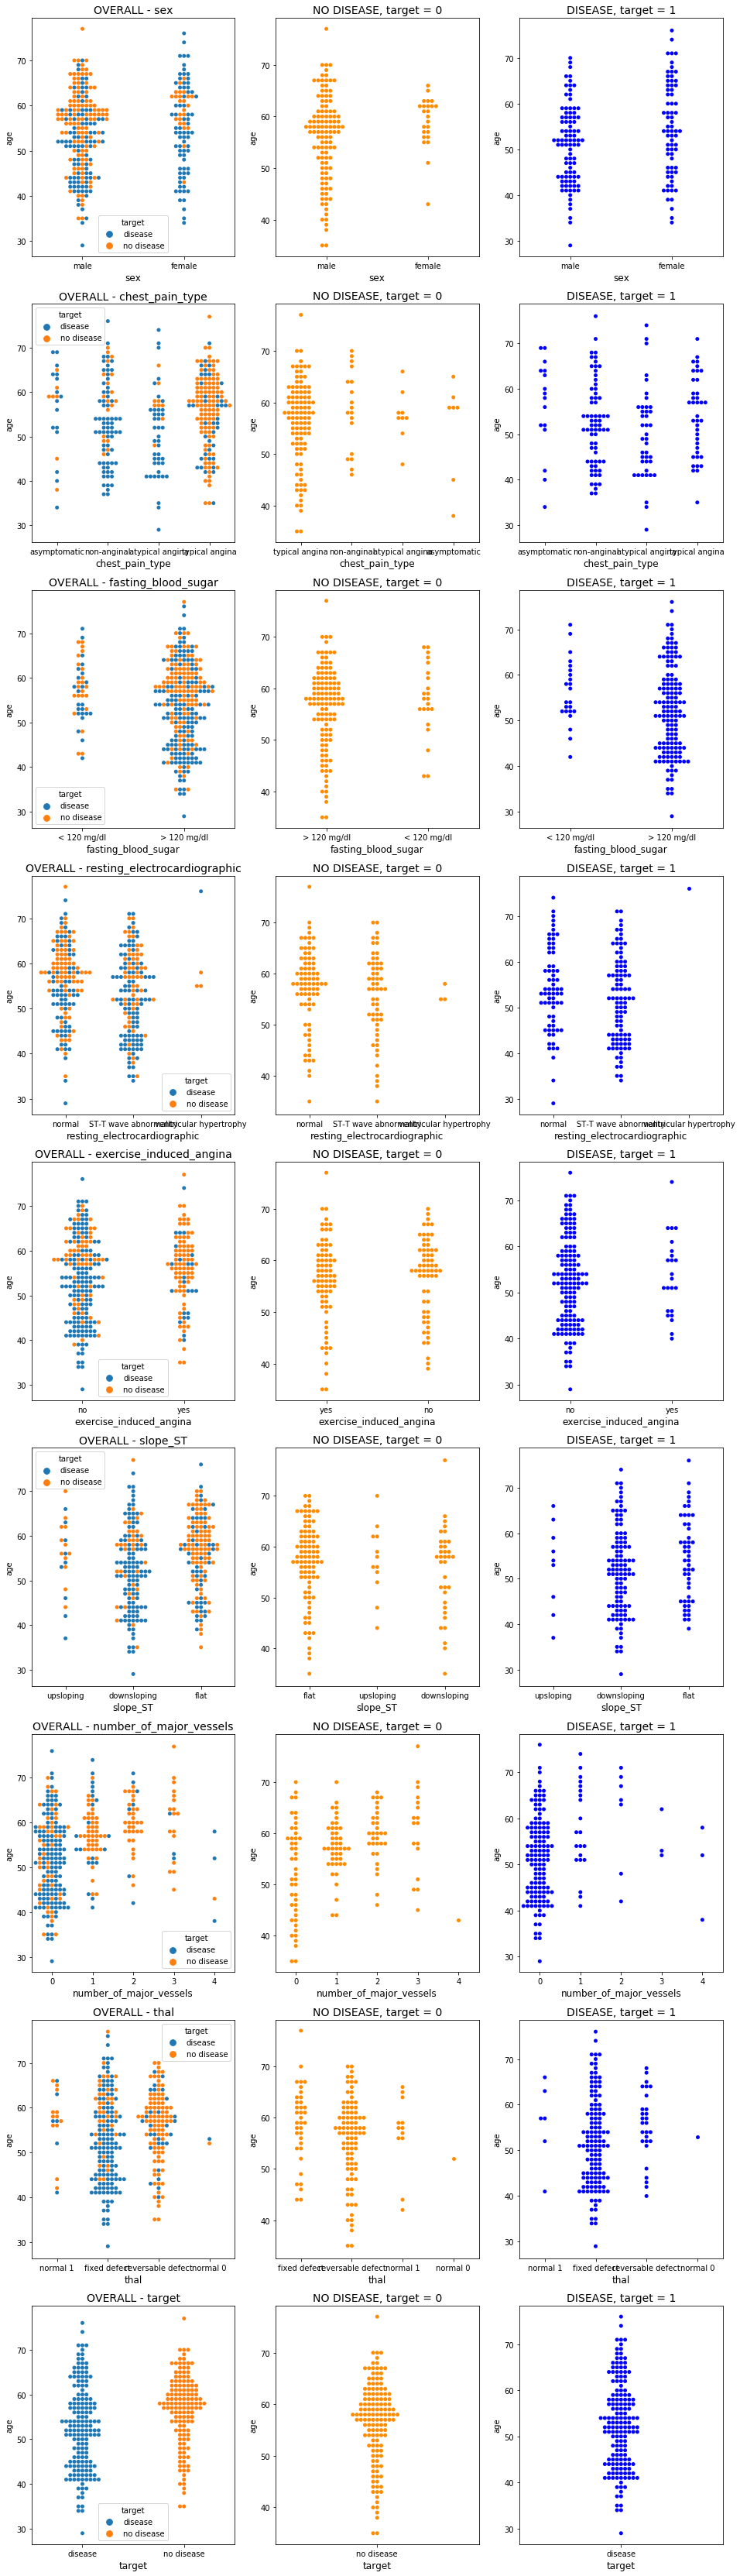

In [12]:
diseaseCAT    = df[(df['target'] == 'disease')]
no_diseaseCAT = df[(df['target'] == 'no disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataCAT.columns)
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,60))

for i in colCAT:
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL - {}'.format(i), fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=df, x=df[i],y=df.age,hue=df.target)
    subPlotNum = subPlotNum + 1
    # no_diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=no_diseaseCAT, x=no_diseaseCAT[i],y=no_diseaseCAT.age,color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    #sns.countplot(diseaseCAT[i], hue=df.sex)#,color='darkred')
    sns.swarmplot(data=diseaseCAT, x=diseaseCAT[i],y=diseaseCAT.age,color='blue')
    subPlotNum = subPlotNum + 1
plt.show()

In [13]:
dataNUM.head()  # numeric dataframe from Section 3.3

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,63,145,233,150,2.3,disease
1,37,130,250,187,3.5,disease
2,41,130,204,172,1.4,disease
3,56,120,236,178,0.8,disease
4,57,120,354,163,0.6,disease


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


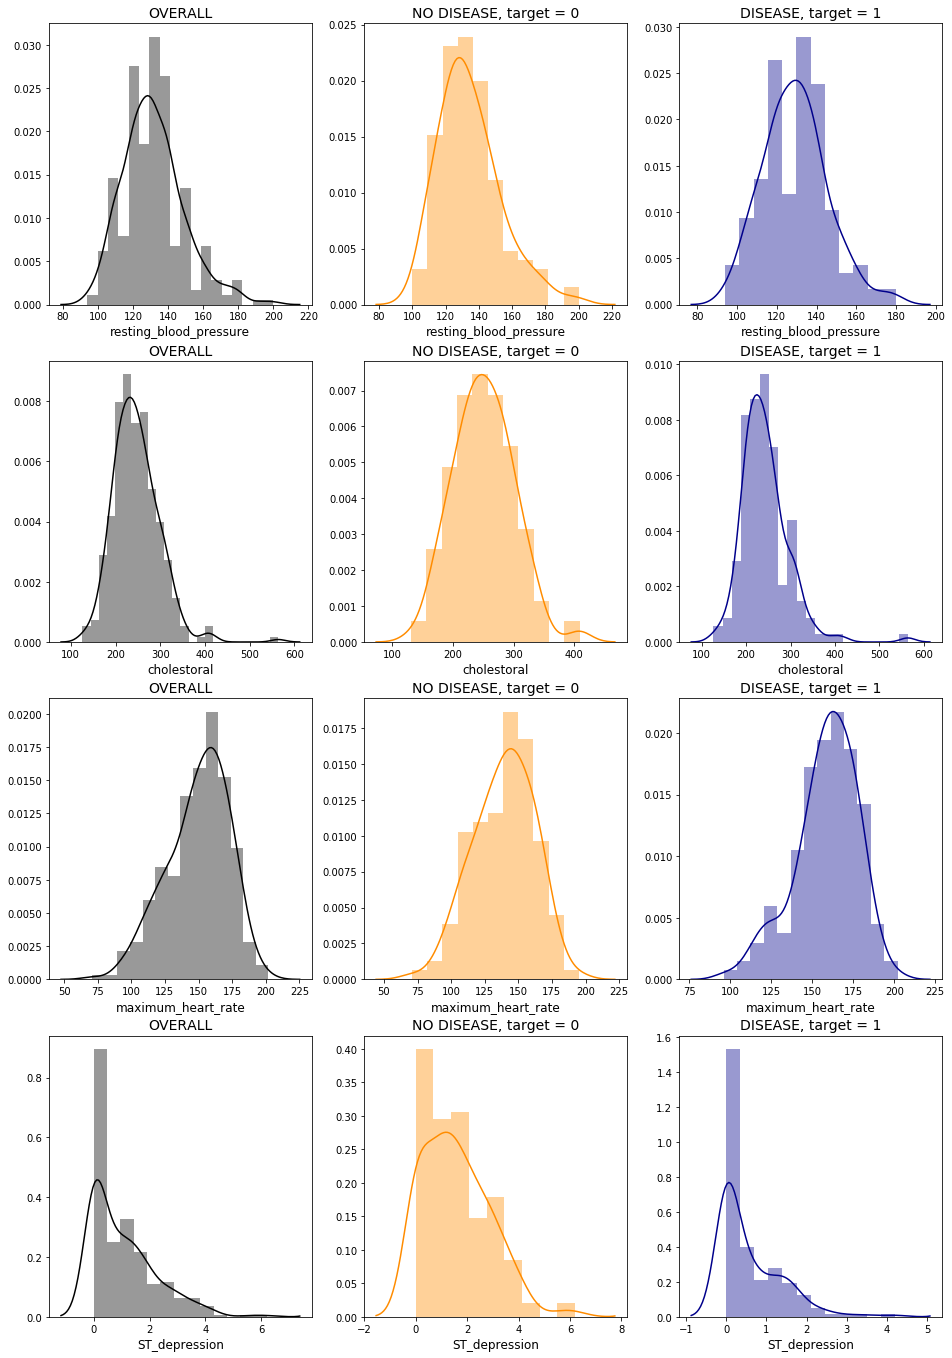

In [15]:
#  assign NUM dataframe for "no disease" and "disease"
no_diseaseNUM = dataNUM[(df['target'] == 'no disease')]
diseaseNUM    = dataNUM[(df['target'] == 'disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataNUM.columns)-1   #  x='age' in plots, drop column
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,30))

for i in dataNUM.columns.drop(["age","target"]):
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df[i],color='black')
    subPlotNum = subPlotNum + 1
    # no_diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(no_diseaseNUM[i],color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(diseaseNUM[i],color='darkblue')
    subPlotNum = subPlotNum + 1

plt.show()

In [16]:
#  one hot encoding works on type 'object'
for i in colCAT:
    df[i] = df[i].astype(object)
    
df_OHE = df[colCAT]               #  dataframe with categorical values
df_OHE = pd.get_dummies(df_OHE)   #  one-hot encoding
df_OHE = df_OHE.join(df[colNUM])  #  add numeric columns

#  change target data to 0/1
df_OHE['target'] = df_OHE['target'].map({'no disease':0,'disease':1})
df_OHE = df_OHE.drop(['target_disease', 'target_no disease'], axis=1)

df_OHE.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,63,145,233,150,2.3,1
1,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,37,130,250,187,3.5,1
2,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,41,130,204,172,1.4,1
3,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,56,120,236,178,0.8,1
4,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,57,120,354,163,0.6,1


In [17]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(df_OHE)
norm[0:2]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.70833333, 0.48113208, 0.24429224, 0.60305344, 0.37096774,
        1.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.16666667, 0.33962264, 0.28310502, 0.88549618, 0.56451613,
        1.        ]])

In [18]:
#  dataframe with the One Hot Encoding and Normalized data
df = pd.DataFrame(norm, index=df_OHE.index, columns=df_OHE.columns)
df.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.583333,0.245283,0.520548,0.702290,0.096774,1.0


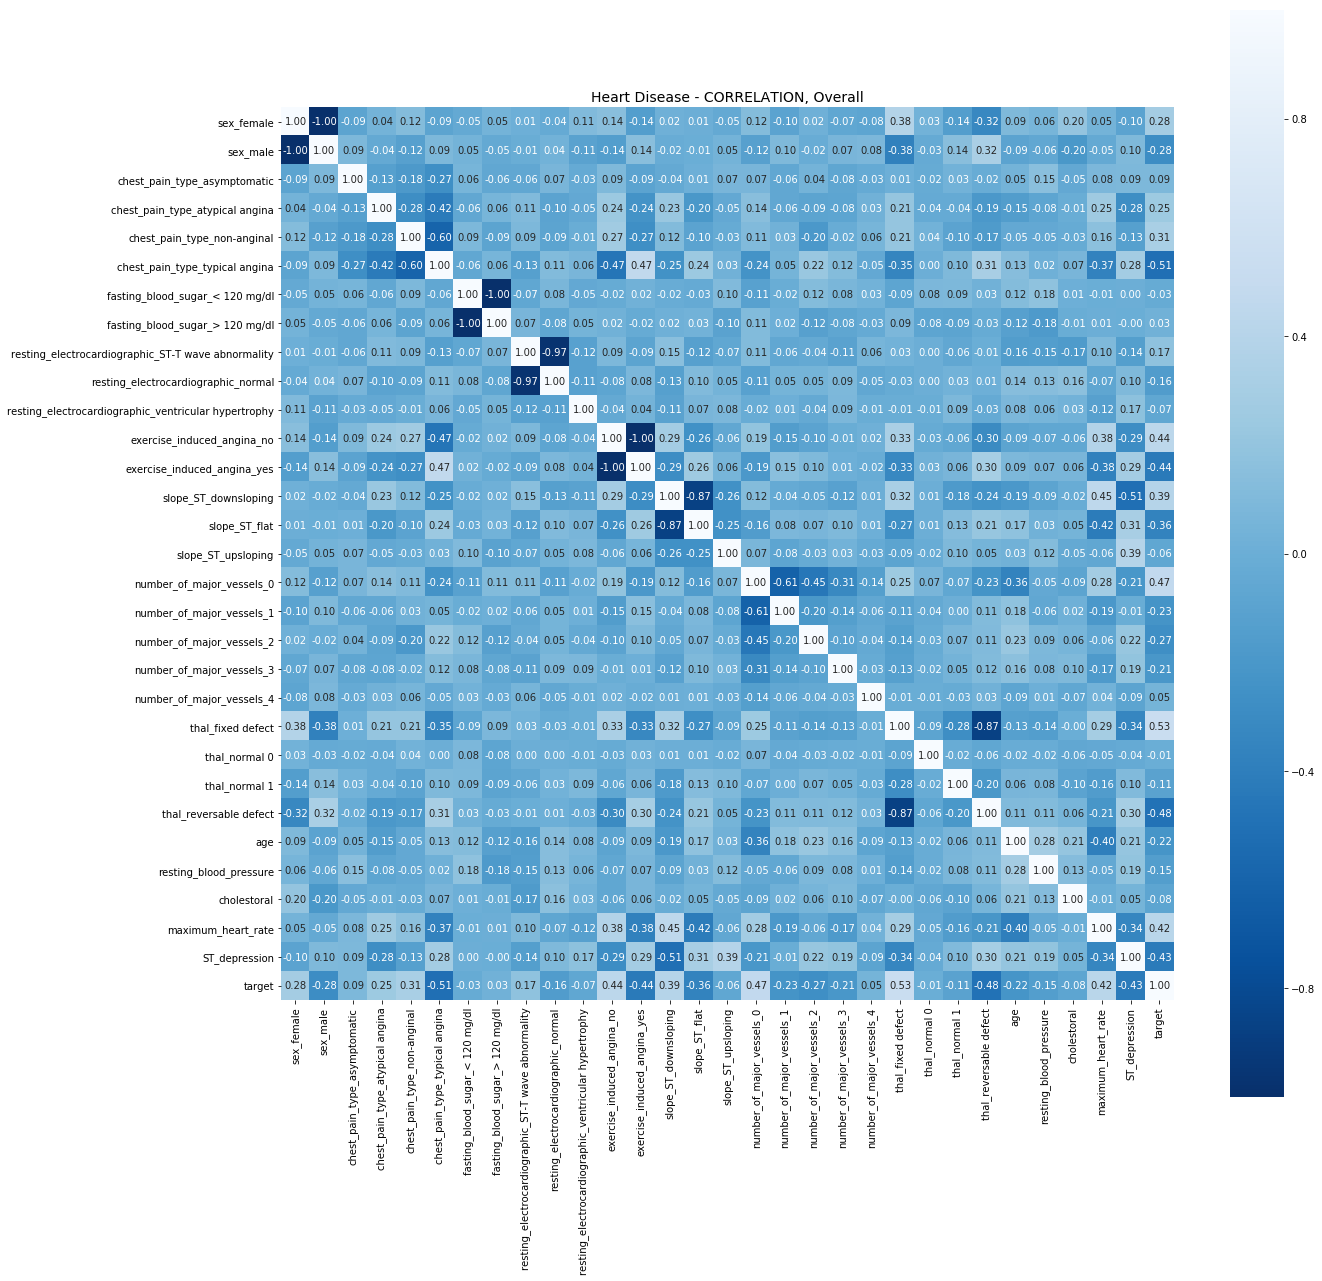

In [19]:
dataCorr = df.corr()
plt.figure(figsize=(20,20))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

In [20]:
corrALL = dataCorr['target'].sort_values(ascending=False)
corrALL = corrALL.drop(['target'])
corrALL.to_frame()

,target
thal_fixed defect,0.526030
number_of_major_vessels_0,0.470849
exercise_induced_angina_no,0.435601
maximum_heart_rate,0.419955
slope_ST_downsloping,0.392121
chest_pain_type_non-anginal,0.313696
sex_female,0.283609
chest_pain_type_atypical angina,0.247649
resting_electrocardiographic_ST-T wave abnormality,0.172827
chest_pain_type_asymptomatic,0.087959


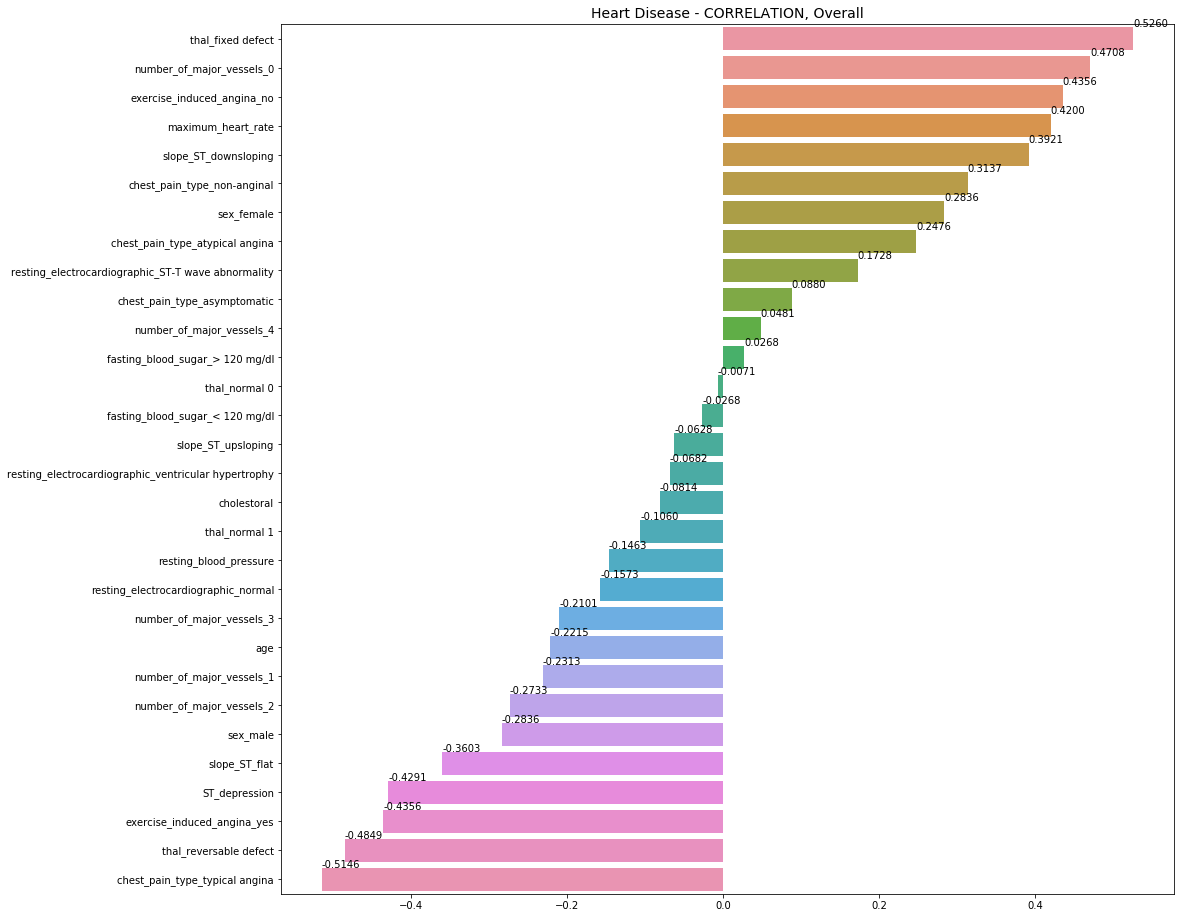

In [21]:
plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
ax = sns.barplot(y=corrALL.index,x=corrALL.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

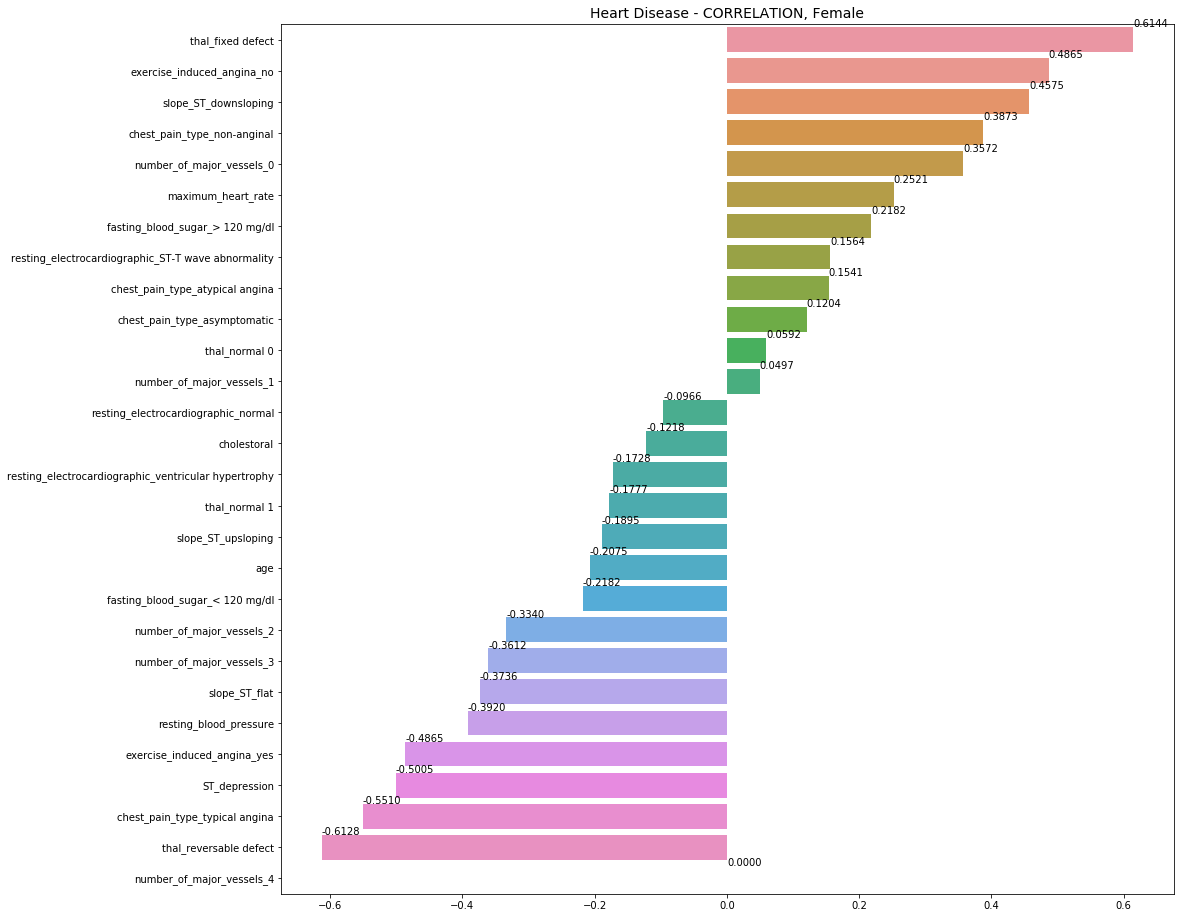

In [22]:
dataFemale = df[(df['sex_female'] == 1)]
dataFemaleCorr = dataFemale.drop(['sex_female','sex_male'], axis=1).corr()
dataFemaleCorr = dataFemaleCorr['target'].sort_values(ascending=False)
dataFemaleCorr['number_of_major_vessels_4'] = 0  # -7.9e-17  all numbers will be exp if not set to 0
dataFemaleCorr.to_frame()
dataFemaleCorr = dataFemaleCorr.drop(['target'])  # for barplot

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Female', fontsize=14)
ax = sns.barplot(y=dataFemaleCorr.index,x=dataFemaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

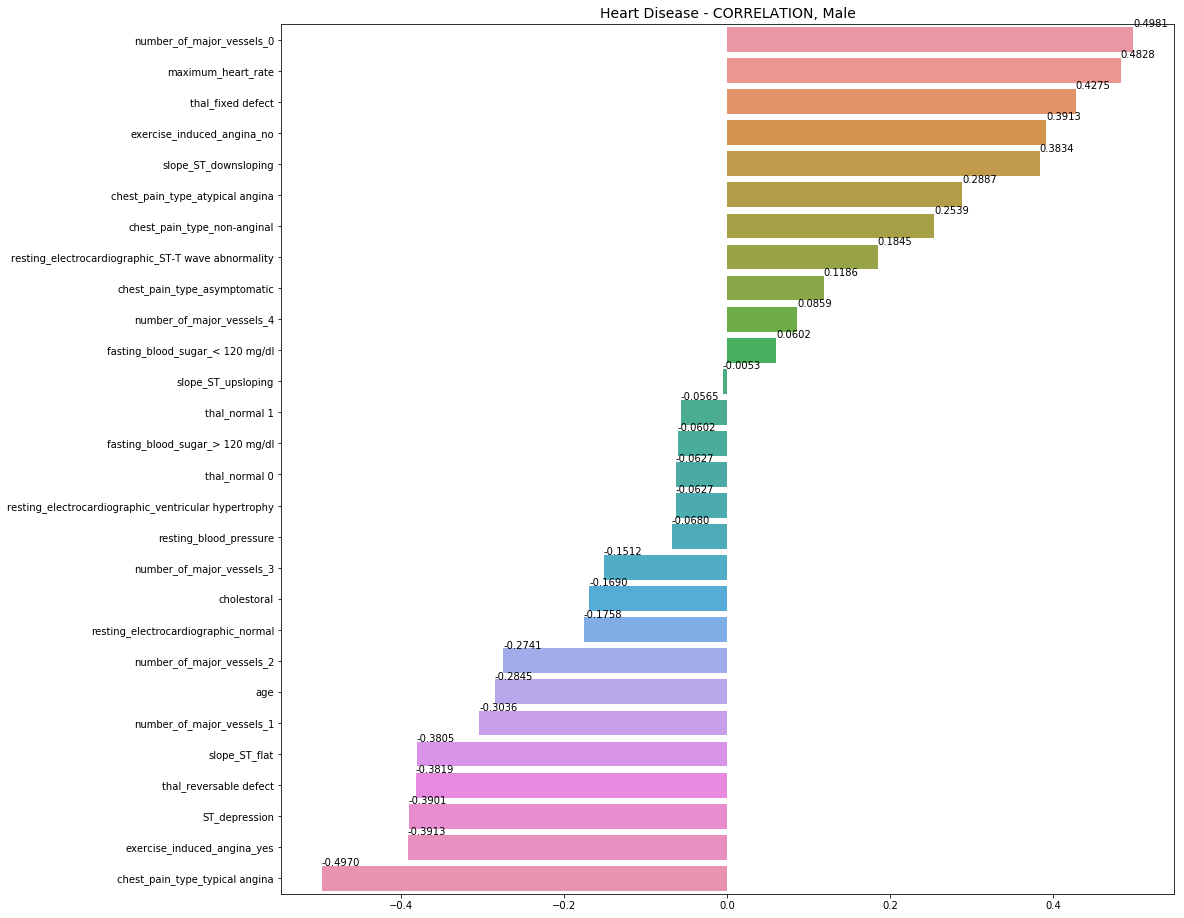

In [23]:
dataMale   = df[(df['sex_male'] == 1)]
dataMaleCorr = dataMale.drop(['sex_female','sex_male'], axis=1).corr()
dataMaleCorr = dataMaleCorr['target'].sort_values(ascending=False)
dataMaleCorr = dataMaleCorr.drop(['target'])

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Male', fontsize=14)
ax = sns.barplot(y=dataMaleCorr.index,x=dataMaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (241, 30) (241,)
Test set:    (61, 30) (61,)


In [25]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
#  predict
y_predict = LR.predict(X_test)
y_predict[0:10]

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0.])

In [27]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy'))
print('Cross Validation Score (mean):  {:3.4%}'.format(cross_val_score(LR, X_train, y_train, cv=5, scoring='accuracy').mean()))

[0.73469388 0.8125     0.91666667 0.75       0.91666667]
Cross Validation Score (mean):  82.6105%


In [28]:
from sklearn.metrics import accuracy_score

print('Accuracy Score:  {:3.4%}'.format(accuracy_score(y_test,y_predict)))

Accuracy Score:  86.8852%


In [29]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_predict)
print('F1 Score:  {:3.4%}'.format(f1score))

F1 Score:  89.1892%


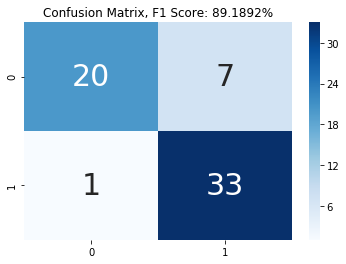

True Positive:	20
True Negative:	7
False Positive:	1
False Negative:	33


In [30]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predict)

sns.heatmap(conf_matrix, annot=True,cmap='Blues',annot_kws={"size": 30})
plt.title("Confusion Matrix, F1 Score: {:3.4%}".format(f1score))
plt.show()

print('True Positive:\t{}'.format(conf_matrix[0,0]))
print('True Negative:\t{}'.format(conf_matrix[0,1]))
print('False Positive:\t{}'.format(conf_matrix[1,0]))
print('False Negative:\t{}'.format(conf_matrix[1,1]))

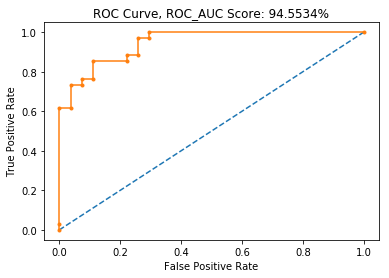

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

LR.probability = True   # need for predict_proba to work
LR.fit(X_train,y_train)
y_predita = LR.predict_proba(X_test)
y_predita = y_predita[:,1]   # positive values only
    
ROC_AUC = roc_auc_score(y_test, y_predita)
fpr, tpr, thresholds = roc_curve(y_test, y_predita)

plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve, ROC_AUC Score: {:3.4%}".format(ROC_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83        27
         1.0       0.82      0.97      0.89        34

   micro avg       0.87      0.87      0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



In [33]:
from sklearn.metrics import log_loss

#  predict_proba returns estimates for all classes
y_predict_prob = LR.predict_proba(X_test)
print(y_predict_prob[0:5])

print("\nLog Loss:  {:3.4}".format(log_loss(y_test, y_predict_prob)))

[[0.45890315 0.54109685]
 [0.59123804 0.40876196]
 [0.37507261 0.62492739]
 [0.40906285 0.59093715]
 [0.6490443  0.3509557 ]]

Log Loss:  0.5114
